In [1]:
##TODO:
#Trimmed data: Remove id column as well? -> doesn't really add anything to the data

In [2]:
##NECESSARY IMPORTS
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering


In [3]:
##LOAD DATA INTO DATAFRAME
all_data = pd.read_csv('data.csv')


##CHECK DATA
'''
all_data.shape
all_data.head()
all_data.describe()
'''
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
##REMOVE 32 ROW AS DATA IS NAN 
trimmed_data = all_data.drop(columns = ['Unnamed: 32', 'id'])

##GET CORRELATION
data_corr = trimmed_data.corr()

##CHECK DATA -> 32 column should be removed 
'''
trimmed_data.shape
trimmed_data.head()
trimmed_data.describe()
'''

trimmed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

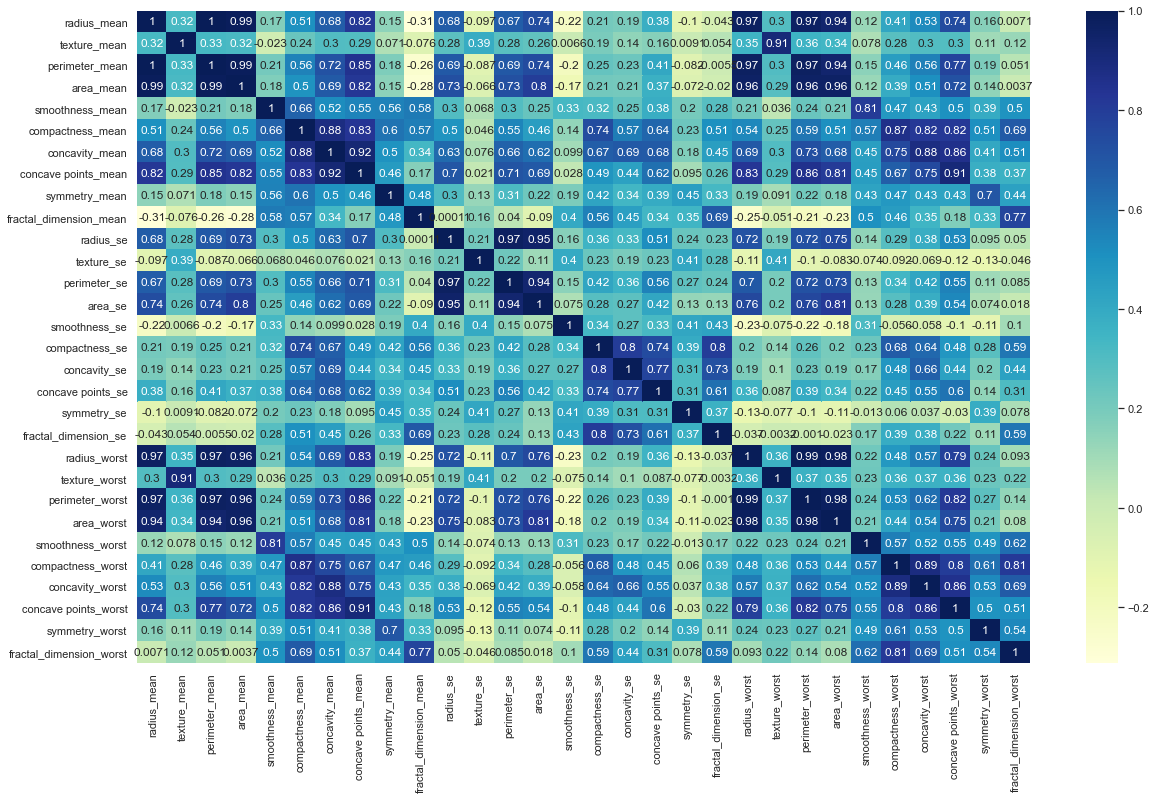

In [5]:
##SHOW HEATMAP OF CORRELATION
sns.set(rc={'figure.figsize': (20, 12)})
sns.heatmap(data_corr,annot = True,cmap="YlGnBu")
plt.show()

# Unsupervised Learning Methods 

In [6]:
## Drop the tags
data_notag = trimmed_data.drop(columns = ['diagnosis'])
data_notag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

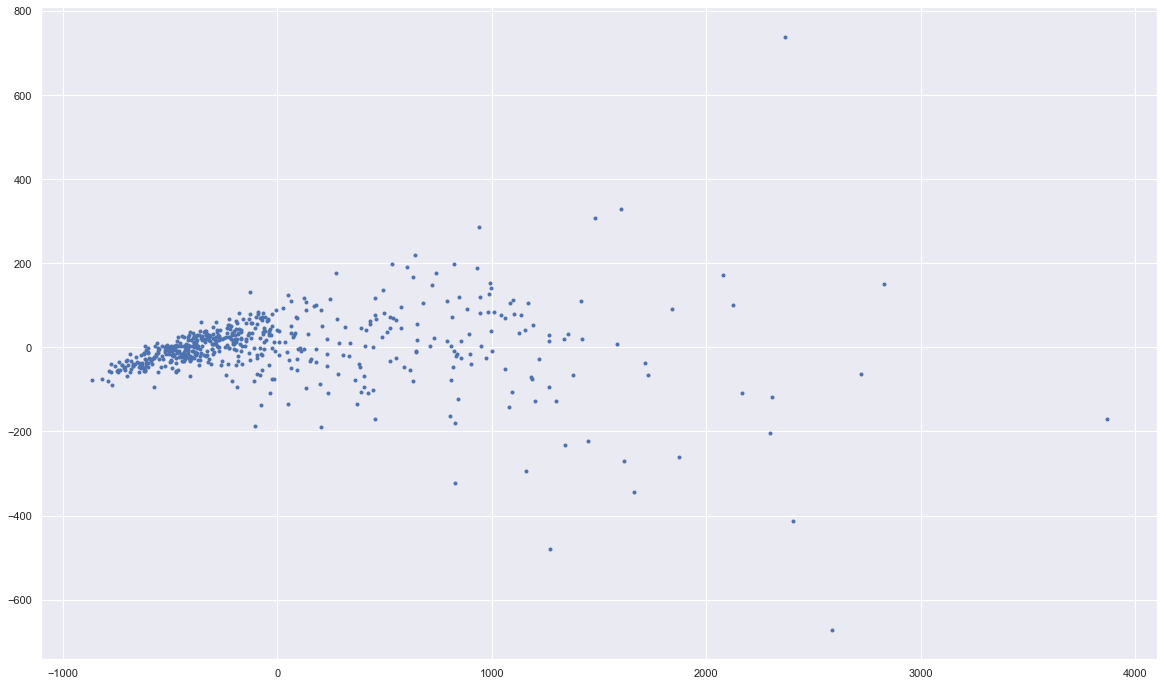

In [7]:
## Perform PCA to Check if Clustering Is Feasible 
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_notag)
data_pca.shape
plt.scatter(data_pca[:, 0], data_pca[:, 1], marker='.')

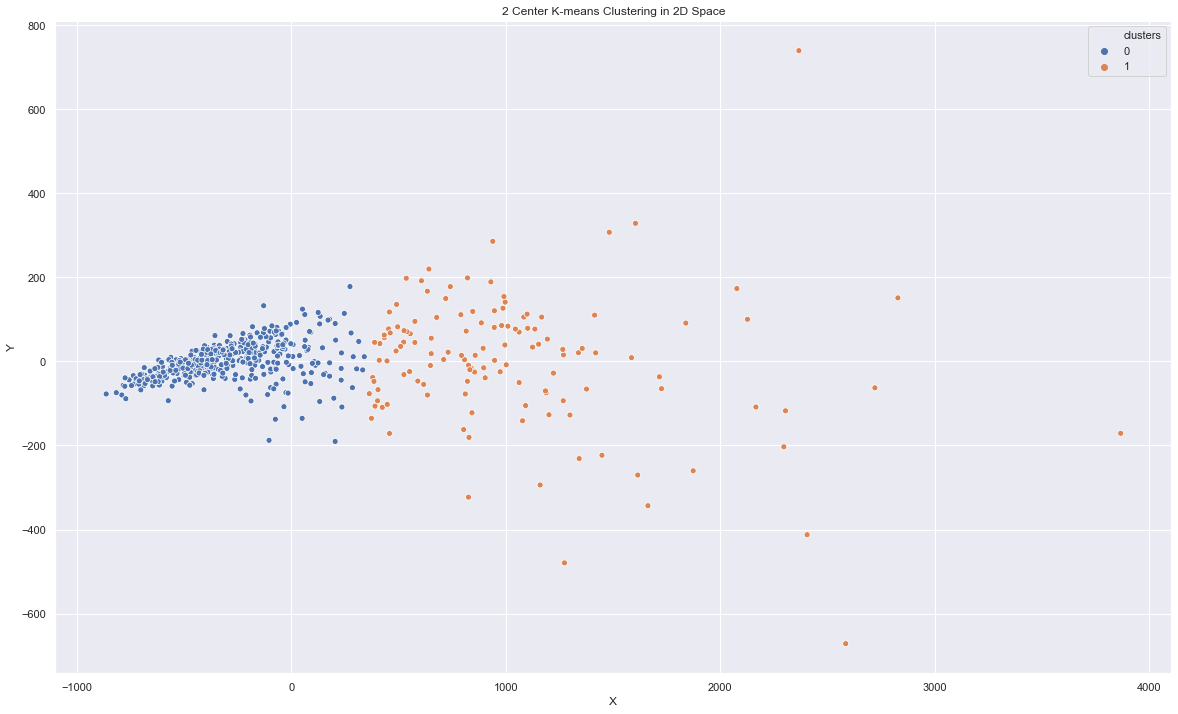

In [24]:
## Try K-Means 
kmeans = KMeans(n_clusters=2)
data_notag['clusters'] = kmeans.fit_predict(data_notag)
data_notag
## Visualize K-Means on the 2D PCA Space 
reduced_data = PCA(n_components=2).fit_transform(data_notag)
results = pd.DataFrame(reduced_data,columns=['X','Y'])
sns.scatterplot(x="X", y="Y", hue=data_notag['clusters'], data=results)
plt.title('2 Center K-means Clustering in 2D Space')
plt.show()

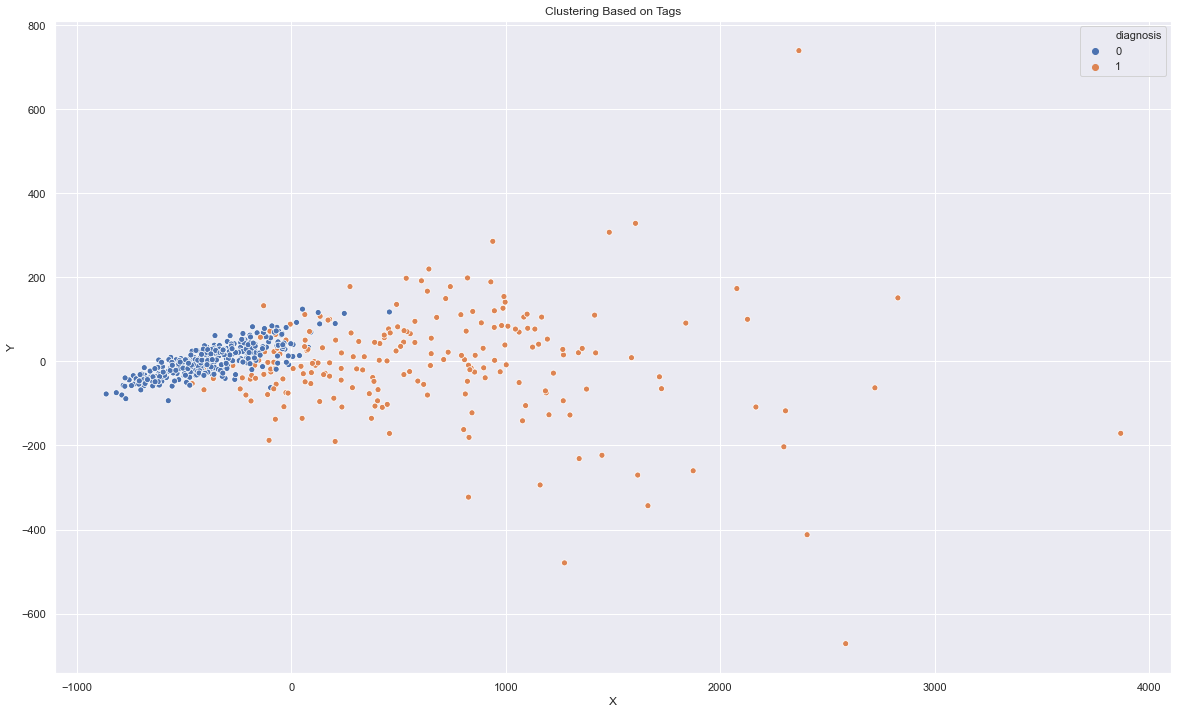

In [9]:
## Cluster according to the tags 
diagnosis = trimmed_data['diagnosis']
diagnosis_numbers = []
for x in diagnosis:
    if x == 'M':
        diagnosis_numbers.append(1)
    elif x == 'B':
        diagnosis_numbers.append(0)
# New dataframe for tagged data
tagged_data = trimmed_data.drop(columns = ['diagnosis'])
tagged_data['diagnosis'] = diagnosis_numbers
# Visualize
tagged_pca = PCA(n_components=2).fit_transform(tagged_data)
temp = pd.DataFrame(tagged_pca,columns=['X','Y'])
sns.scatterplot(x="X", y="Y", hue=tagged_data['diagnosis'], data=temp)
plt.title('Clustering Based on Tags')
plt.show()

In [19]:
## Check accuracy versus the labels 
label_vs_cluster = pd.concat([tagged_data['diagnosis'],data_notag['clusters']], axis = 1, keys = ['diagnosis','clusters'])
comparison = np.where(label_vs_cluster['diagnosis'] == label_vs_cluster['clusters'], True, False)
label_vs_cluster['comparison'] = comparison
label_vs_cluster


,diagnosis,clusters,comparison
0,1,1,True
1,1,1,True
2,1,1,True
3,1,0,False
4,1,1,True
...,...,...,...
564,1,1,True
565,1,1,True
566,1,0,False
567,1,1,True


In [20]:
label_vs_cluster['comparison'].value_counts()

True     486
False     83
Name: comparison, dtype: int64

In [32]:
kmeans_accuracy = 486/569
kmeans_accuracy

0.8541300527240774

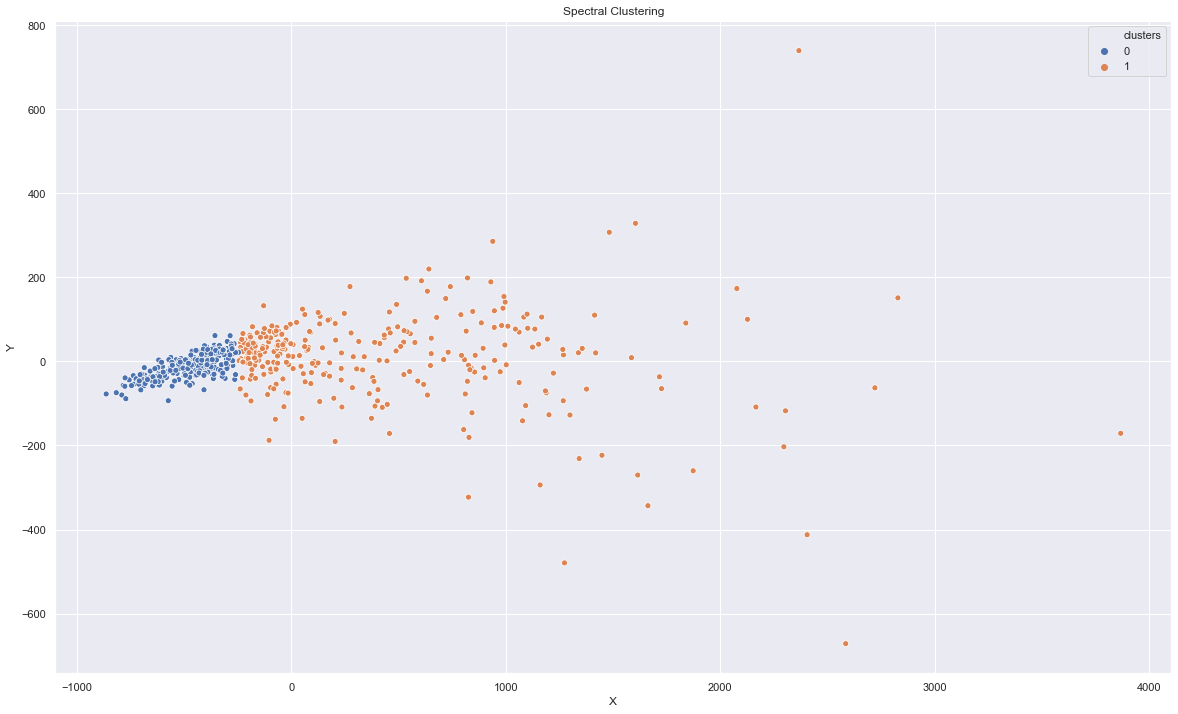

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,clusters
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [12]:
## Spectral Clustering 
spectral = trimmed_data.drop(columns = ['diagnosis'])
spectral['clusters']= SpectralClustering(n_clusters=2, affinity='nearest_neighbors').fit_predict(spectral)
# Visualize
spectral_pca = PCA(n_components=2).fit_transform(spectral)
spec = pd.DataFrame(spectral_pca,columns=['X','Y'])
sns.scatterplot(x="X", y="Y", hue=spectral['clusters'], data=spec)
plt.title('Spectral Clustering')
plt.show()

In [29]:
## Check accuracy versus the labels 
label_vs_spec = pd.concat([tagged_data['diagnosis'],spectral['clusters']], axis = 1, keys = ['diagnosis','clusters'])
spectral_comparison = np.where(label_vs_spec['diagnosis'] == label_vs_spec['clusters'], True, False)
label_vs_spec['comparison'] = spectral_comparison
label_vs_spec


,diagnosis,clusters,comparison
0,1,1,True
1,1,1,True
2,1,1,True
3,1,0,False
4,1,1,True
...,...,...,...
564,1,1,True
565,1,1,True
566,1,1,True
567,1,1,True


In [30]:
label_vs_spec['comparison'].value_counts()

True     469
False    100
Name: comparison, dtype: int64

In [34]:
spectral_accuracy = 469/569
spectral_accuracy

0.8242530755711776